# Predict Heart Disease Status Based on Quantifiable Variables

# Introduction:

Cardiovascular diseases (CVDs) is a class of disease that involves the heart or blood vessels. the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Our question is can we determine heart disease status based on quantifiable variables. This dataset we will be using is a tabular data set with comma-separated variables. It has 12 variables, but we will be only using 8 variables: age, sex, Chest Pain Type, cholesterol level, old peak, resting blood pressure, maximum heart rate, and Heart Disease in order to answer our question. 

We choose thses as variables as they are more representative of heart disease base on our research.

### Attribute Information
 1. Age: years
 2. Sex: (0 = MALE, 1 = FEMALE)
 3. ChestPainType: (ATA = 1, NAP = 2, ASY =3, TA =4)
 4. Cholesterol: (mm/dl)
 5. Oldpeak: (Numeric value measured in depression)
 6. RestingBP: resting blood pressure (mm HG)
 7. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
 8. HeartDisease:(1: heart disease, 0: Normal)

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading files

In [2]:
heart_data <- read_csv("heart.csv") %>%
              mutate(HeartDisease = as_factor(HeartDisease))

head(heart_data)

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


#### Split data to train and test¶

In [3]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = HeartDisease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#### Summarize dataset

In [4]:
num_obs <- nrow(heart_train)
heart_sum <- heart_train %>%
             glimpse() %>%
             group_by(HeartDisease) %>%
             summarize(count = n(), percentage = n()/ num_obs* 100)
heart_sum 

checking_for_na <- sum(is.na(heart_train))
checking_for_na

summary(heart_train)

Rows: 689
Columns: 12
$ Age            <dbl> 40, 49, 37, 39, 54, 37, 48, 37, 58, 39, 49, 42, 54, 60…
$ Sex            <chr> "M", "F", "M", "M", "M", "M", "F", "F", "M", "M", "M",…
$ ChestPainType  <chr> "ATA", "NAP", "ATA", "NAP", "ATA", "ASY", "ATA", "NAP"…
$ RestingBP      <dbl> 140, 160, 130, 120, 110, 140, 120, 130, 136, 120, 140,…
$ Cholesterol    <dbl> 289, 180, 283, 339, 208, 207, 284, 211, 164, 204, 234,…
$ FastingBS      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ RestingECG     <chr> "Normal", "Normal", "ST", "Normal", "Normal", "Normal"…
$ MaxHR          <dbl> 172, 156, 98, 170, 142, 130, 120, 142, 99, 145, 140, 1…
$ ExerciseAngina <chr> "N", "N", "N", "N", "N", "Y", "N", "N", "Y", "N", "Y",…
$ Oldpeak        <dbl> 0.0, 1.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 2.0, 0.0, 1.0,…
$ ST_Slope       <chr> "Up", "Flat", "Up", "Up", "Up", "Flat", "Up", "Up", "F…
$ HeartDisease   <fct> 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, …


`summarise()` ungrouping output (override with `.groups` argument)



HeartDisease,count,percentage
<fct>,<int>,<dbl>
0,308,44.70247
1,381,55.29753


[1] 0

      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:689         Length:689         Min.   :  0.0  
 1st Qu.:47.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :53.38                                         Mean   :132.4  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   :  0.0   Min.   :0.0000   Length:689         Min.   : 60.0  
 1st Qu.:169.0   1st Qu.:0.0000   Class :character   1st Qu.:120.0  
 Median :223.0   Median :0.0000   Mode  :character   Median :137.0  
 Mean   :199.7   Mean   :0.2322                      Mean   :136.4  
 3rd Qu.:269.0   3rd Qu.:0.0000                      3rd Qu.:155.0  
 Max.   :603.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

#### Observations from Summary
1. Resting BP and Cholesterol have zero as a minimum which is unusual.
2. There may be outliers/Missings in Cholesterol and Resting BP being presented as zero.
3. Number of rows 689 and number of columns 12.
4. Percentage of people with heart disease: 44.70 %
5. Percentage of people without heart disease: 55.30%

#### Fixing zeros in and Resting BP and CHolesterol

In [5]:
heart_train <- heart_train%>%
               filter(RestingBP != 0, Cholesterol != 0)
count(heart_train)
summary(heart_train)
head(heart_train)

n
<int>
560


      Age           Sex            ChestPainType        RestingBP    
 Min.   :28.0   Length:560         Length:560         Min.   : 92.0  
 1st Qu.:46.0   Class :character   Class :character   1st Qu.:120.0  
 Median :54.0   Mode  :character   Mode  :character   Median :130.0  
 Mean   :52.9                                         Mean   :133.5  
 3rd Qu.:59.0                                         3rd Qu.:140.0  
 Max.   :77.0                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   : 85.0   Min.   :0.0000   Length:560         Min.   : 69.0  
 1st Qu.:208.0   1st Qu.:0.0000   Class :character   1st Qu.:122.0  
 Median :238.0   Median :0.0000   Mode  :character   Median :140.0  
 Mean   :245.7   Mean   :0.1643                      Mean   :139.7  
 3rd Qu.:277.0   3rd Qu.:0.0000                      3rd Qu.:159.0  
 Max.   :603.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina        Oldp

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


#### Visualizations of data

Heart Disease with Age

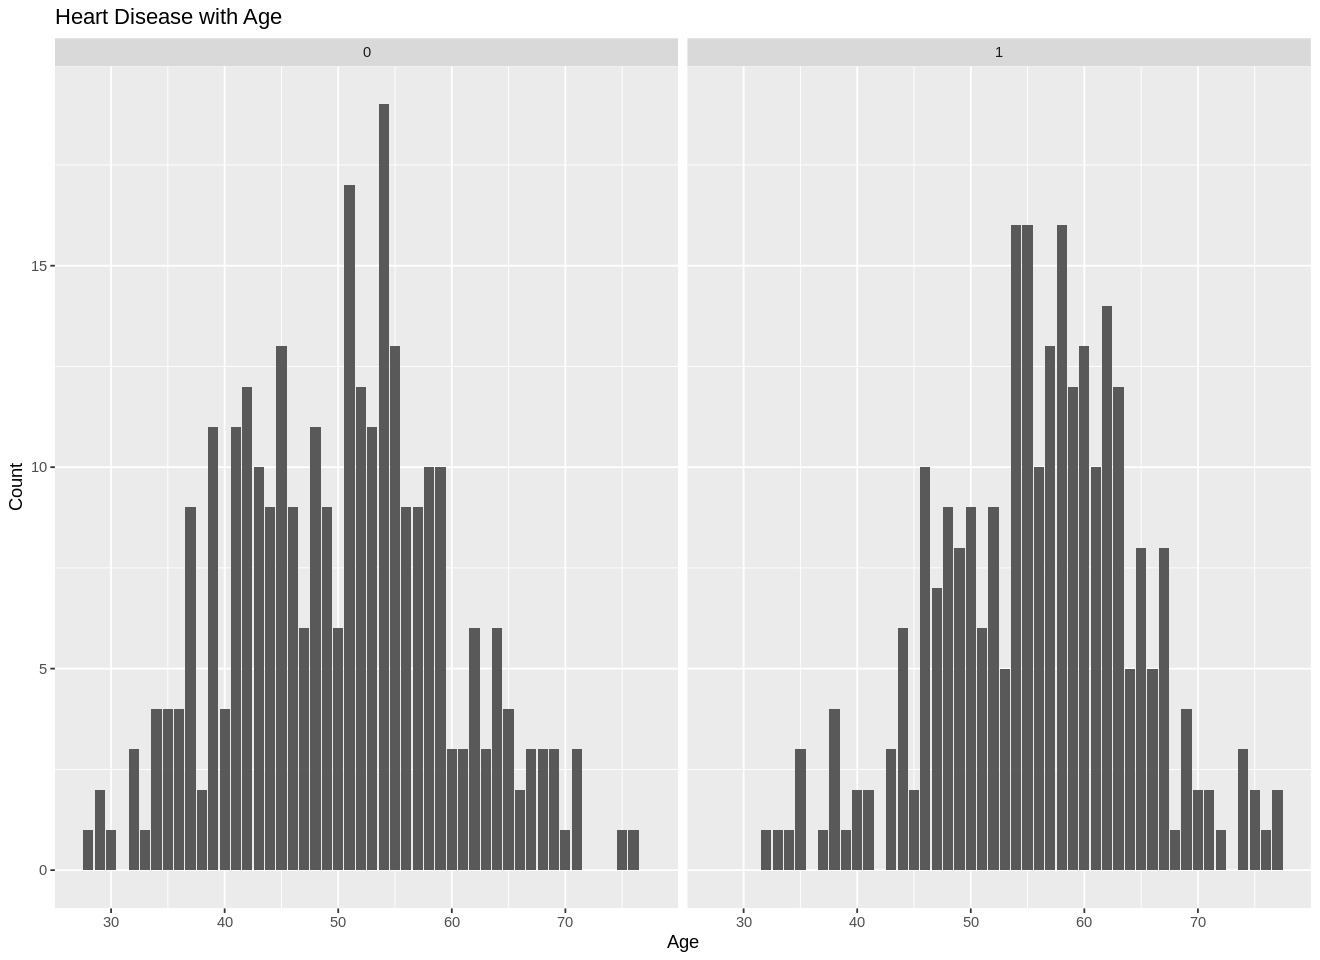

In [6]:
HeartDisease_Age_plot <- heart_train %>%
                         ggplot(aes(x = Age, fill = Age)) +
                         geom_bar() +
                         facet_grid(~HeartDisease) +
                         labs(title = "Heart Disease with Age", x = "Age", y = "Count")
options(repr.plot.width = 11, repr.plot.height = 8)

HeartDisease_Age_plot

Heart Disease with Sex

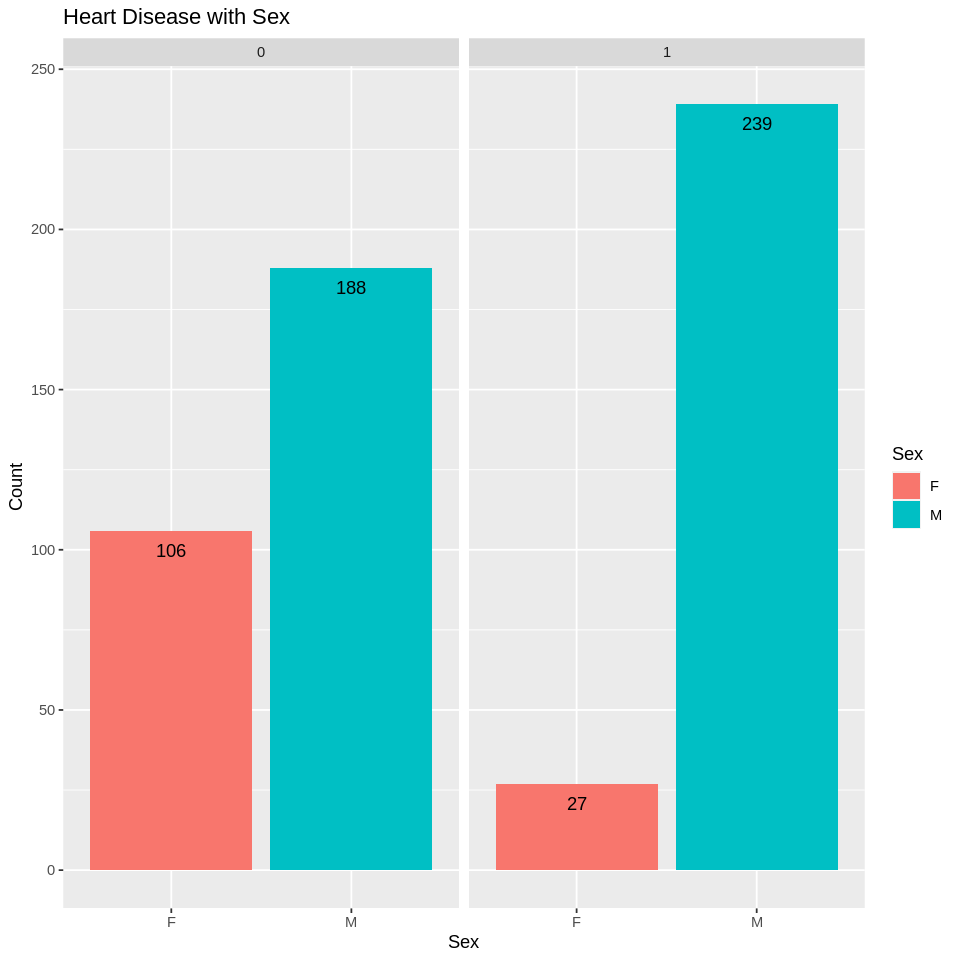

In [7]:
HeartDisease_Sex_plot <- heart_train %>%
                         ggplot(aes(x = Sex, fill = Sex)) +
                         geom_bar() +
                         facet_grid(~HeartDisease) +
                         geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                         labs(title = "Heart Disease with Sex", x = "Sex", y = "Count", fill = "Sex")
options(repr.plot.width = 8, repr.plot.height = 8)
HeartDisease_Sex_plot

Heart Disease with Chest Pain Type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

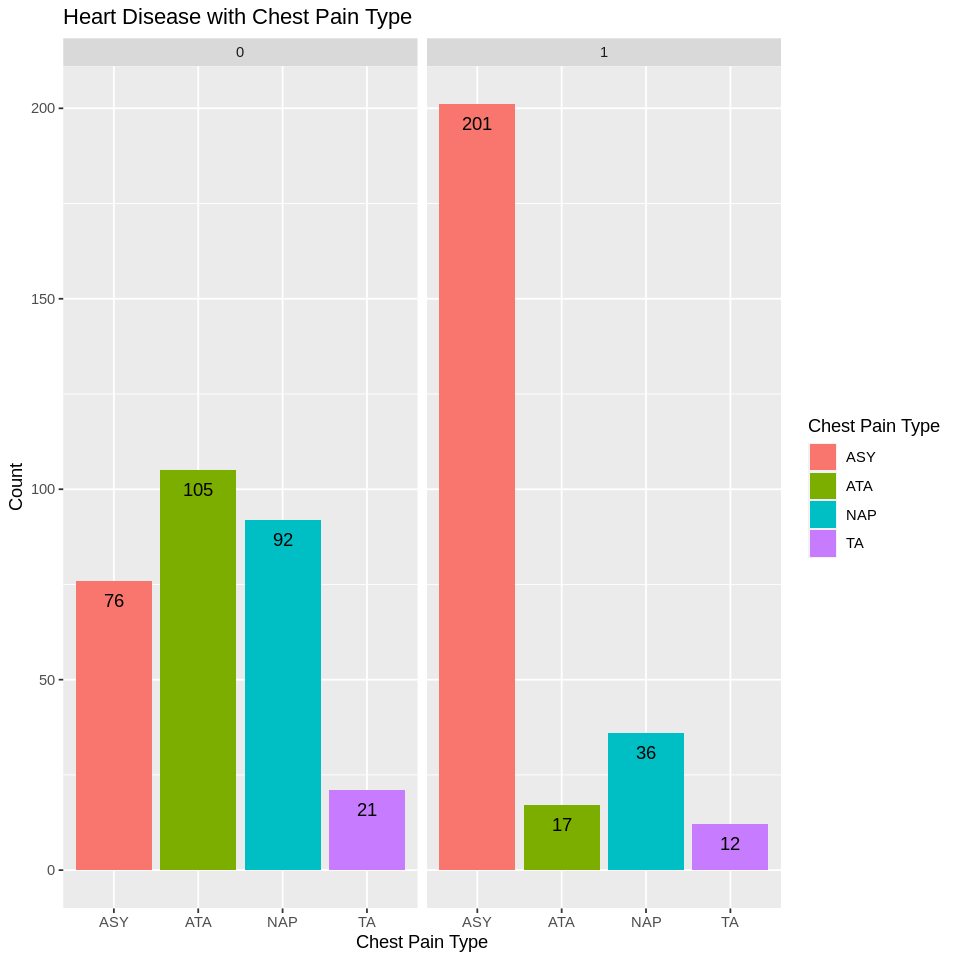

In [8]:
HeartDisease_ChestPainType_plot <- heart_train %>%
                                   ggplot(aes(x = ChestPainType, fill = ChestPainType)) +
                                   geom_bar() +
                                   facet_grid(~HeartDisease) +
                                   geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                   labs(title = "Heart Disease with Chest Pain Type", x = "Chest Pain Type", y = "Count", 
                                        fill = "Chest Pain Type")
HeartDisease_ChestPainType_plot

Heart Disease with Resting Blood Pressure

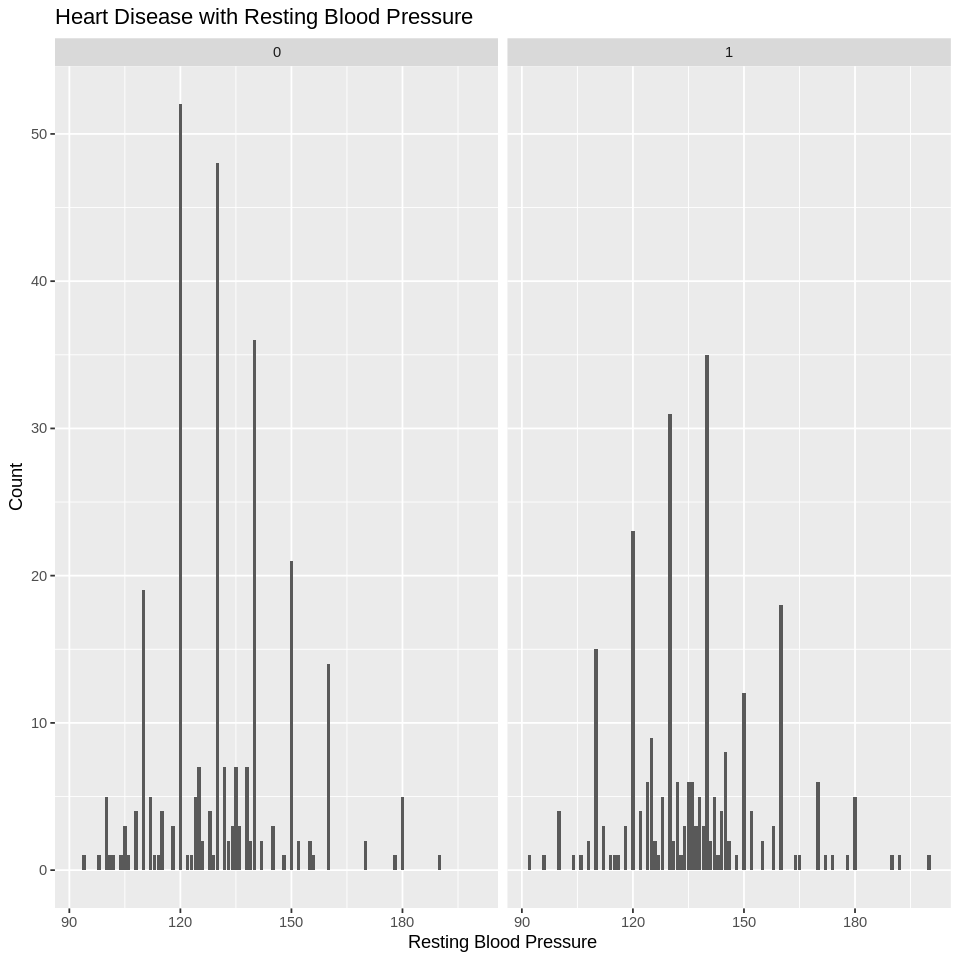

In [9]:
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = RestingBP, fill = RestingBP)) +
                               geom_bar() +
                               facet_grid(~HeartDisease) +
                               labs(title = "Heart Disease with Resting Blood Pressure", x = "Resting Blood Pressure", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Heart Disease with Serum Cholestero

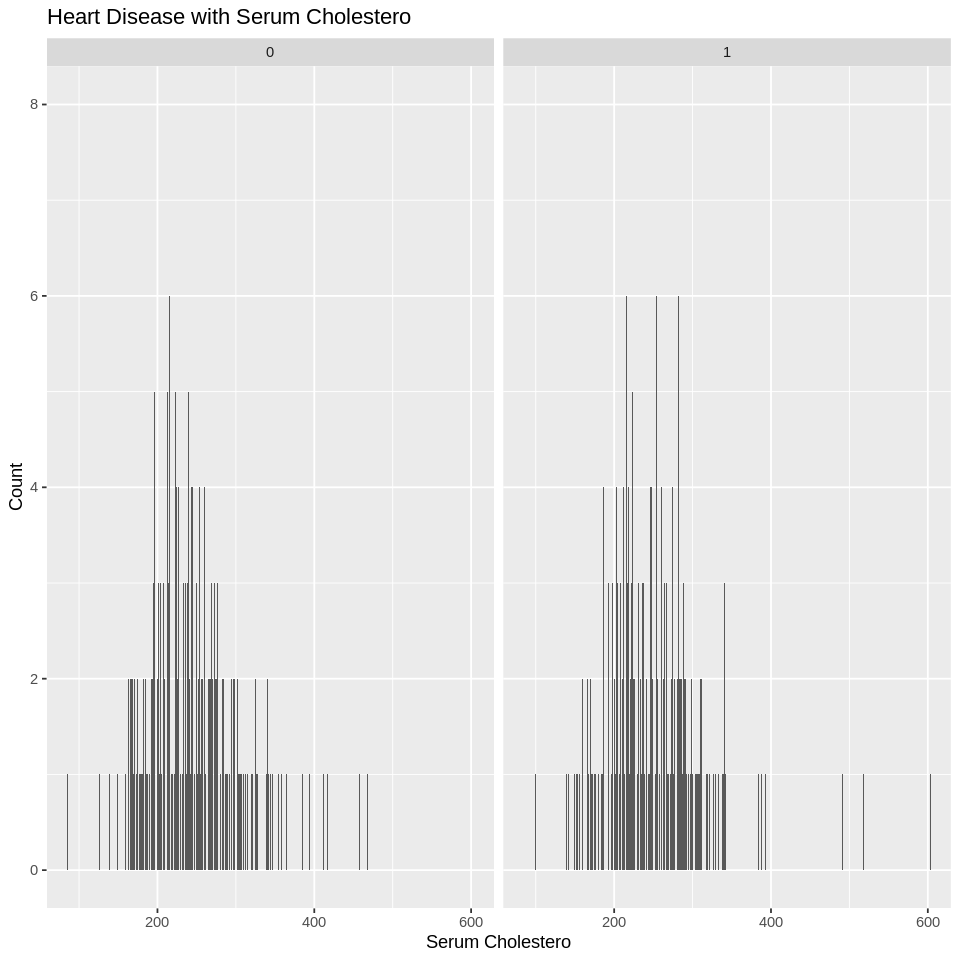

In [10]:
HeartDisease_Cholesterol_plot <- heart_train %>%
                                 ggplot(aes(x = Cholesterol, fill = Cholesterol)) +
                                 facet_grid(~HeartDisease) +
                                 geom_bar() +
                                 labs(title = "Heart Disease with Serum Cholestero", x = "Serum Cholestero", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_Cholesterol_plot

Heart Disease with Fasting Blood Sugar

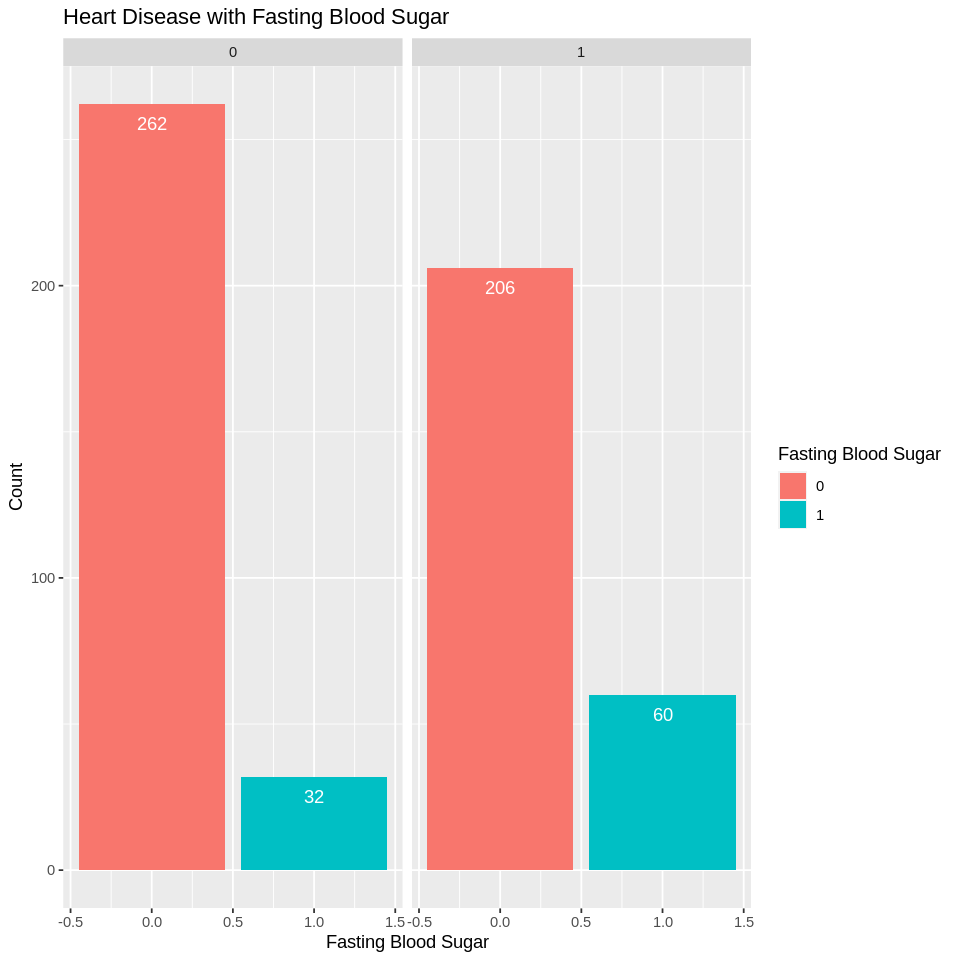

In [11]:
HeartDisease_FastingBS_plot <- heart_train %>%
                               ggplot(aes(x = FastingBS, fill = as.character(FastingBS))) +
                               geom_bar() +
                               facet_grid(~HeartDisease) +
                               geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "white") +
                               labs(title = "Heart Disease with Fasting Blood Sugar", 
                                    x = "Fasting Blood Sugar", y = "Count", fill = "Fasting Blood Sugar")
HeartDisease_FastingBS_plot

Heart Disease with Resting Electrocardiogram Results (Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

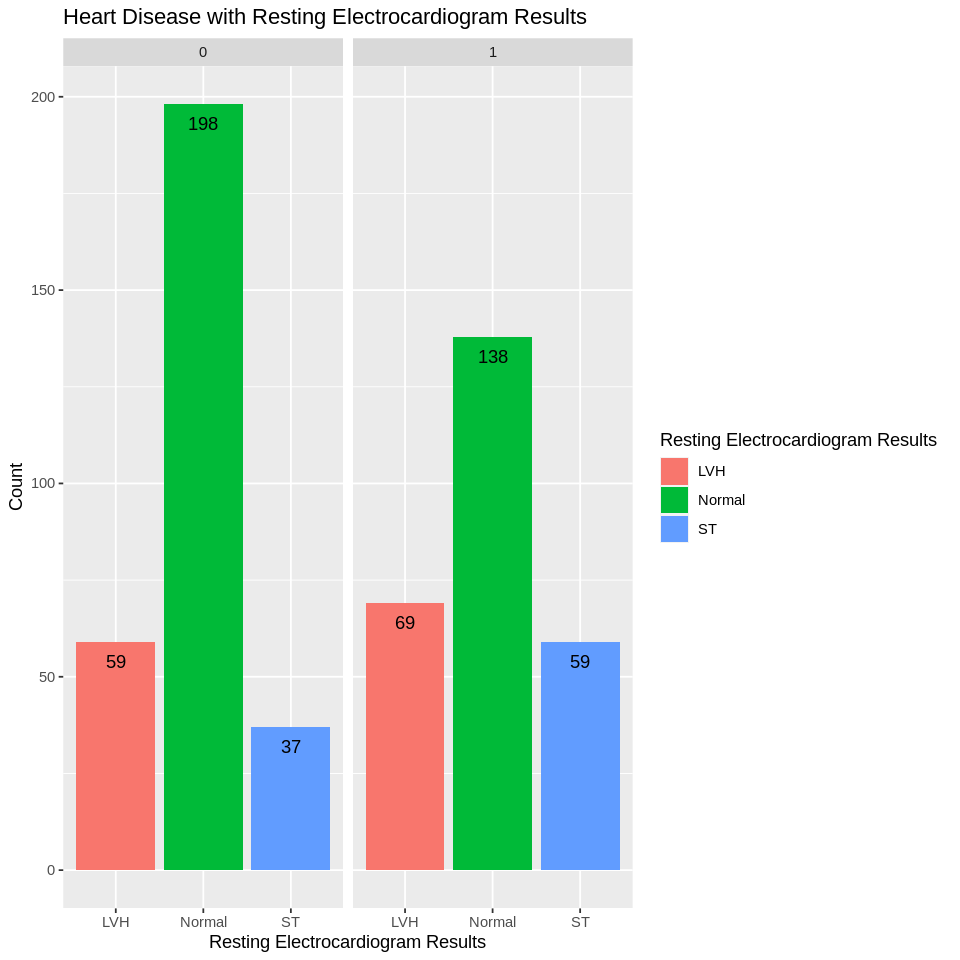

In [12]:
HeartDisease_RestingECG_plot <- heart_train %>%
                                ggplot(aes(x = RestingECG, fill = RestingECG)) +
                                geom_bar() +
                                facet_grid(~HeartDisease) +
                                geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                labs(title = "Heart Disease with Resting Electrocardiogram Results", 
                                     x = "Resting Electrocardiogram Results", y = "Count", 
                                     fill = "Resting Electrocardiogram Results")
HeartDisease_RestingECG_plot

HeartDisease with Maximum Heart Rate

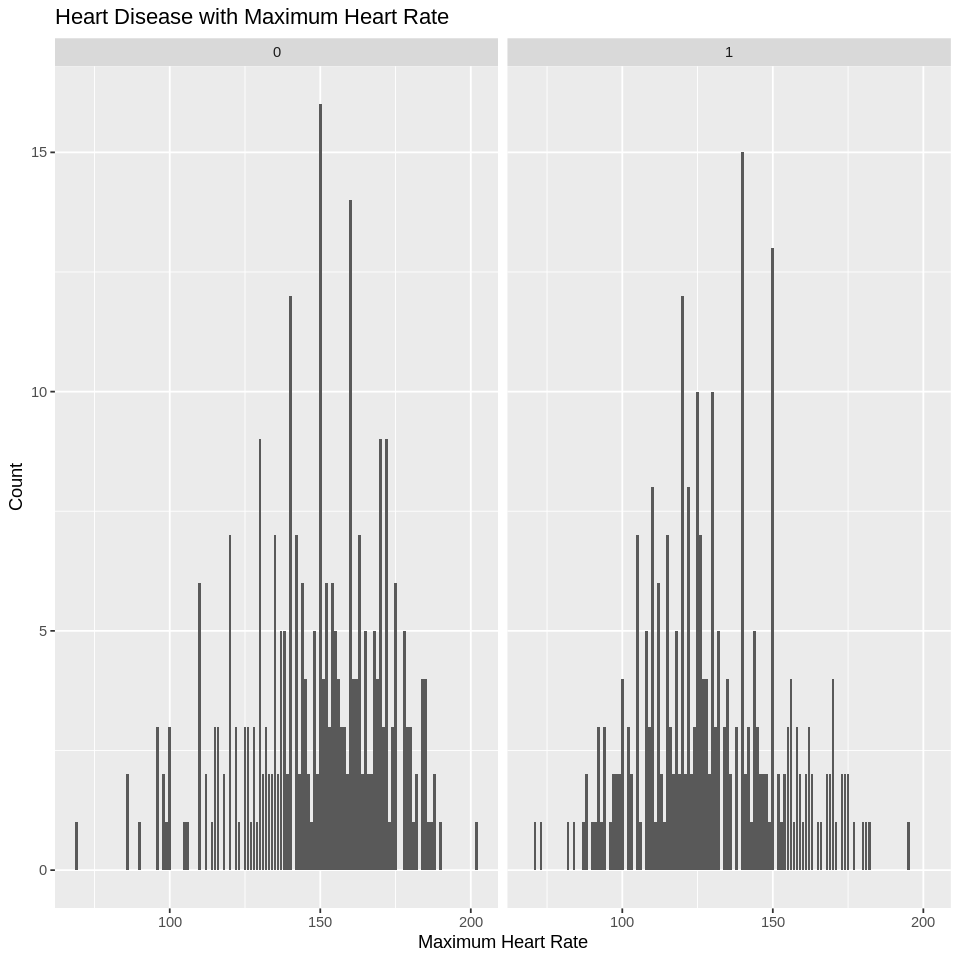

In [13]:
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = MaxHR, fill = MaxHR)) +
                               facet_grid(~HeartDisease) +
                               geom_bar() +
                               labs(title = "Heart Disease with Maximum Heart Rate", x = "Maximum Heart Rate", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Heart Disease with Exercise-Induced Angina (Y: Yes, N: No)

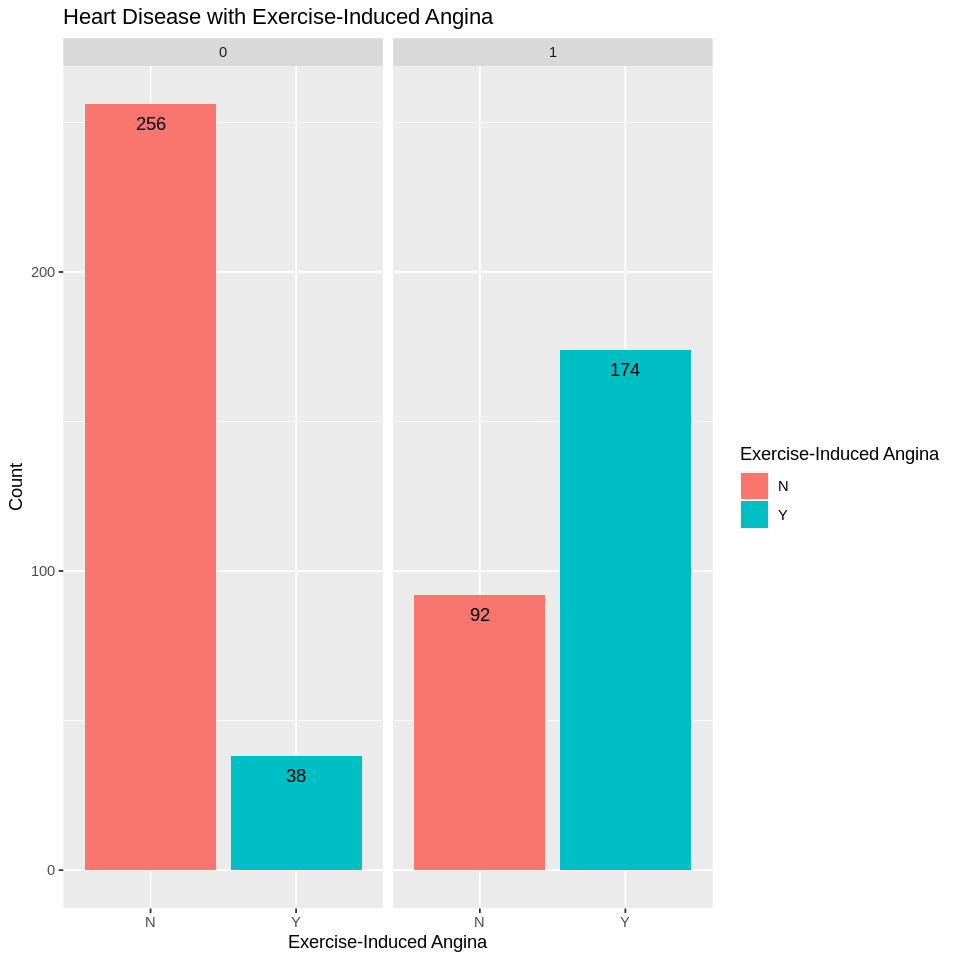

In [14]:
HeartDisease_ExerciseAngina_plot <- heart_train %>%
                                    ggplot(aes(x = ExerciseAngina, fill = ExerciseAngina)) +
                                    geom_bar() +
                                    facet_grid(~HeartDisease) +
                                    geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                    labs(title = "Heart Disease with Exercise-Induced Angina", 
                                         x = "Exercise-Induced Angina", y = "Count", 
                                         fill = "Exercise-Induced Angina")
HeartDisease_ExerciseAngina_plot 

Heart Disease with Old peak (ST, Numeric value measured in depression)

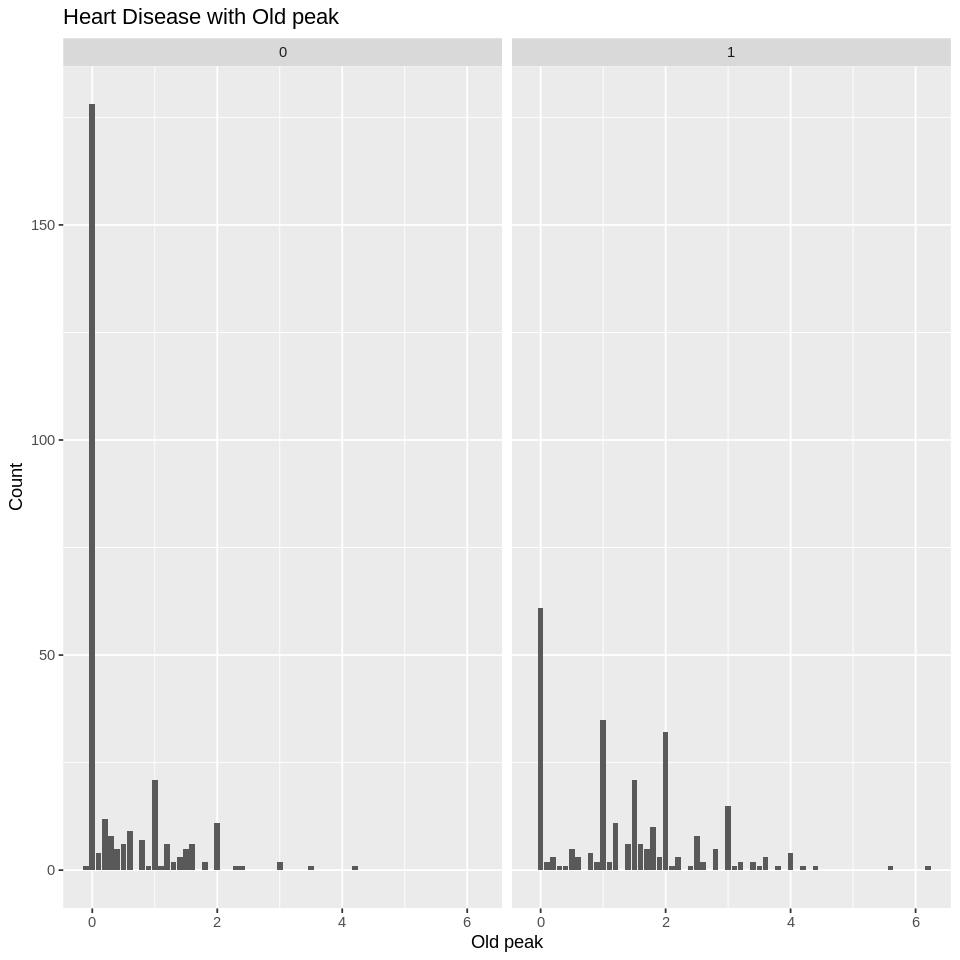

In [15]:
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = Oldpeak, fill = Oldpeak)) +
                               facet_grid(~HeartDisease) +
                               geom_bar() +
                               labs(title = "Heart Disease with Old peak", x = "Old peak", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Heart Disease with ST_Slope(ST_Slope: the slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping)

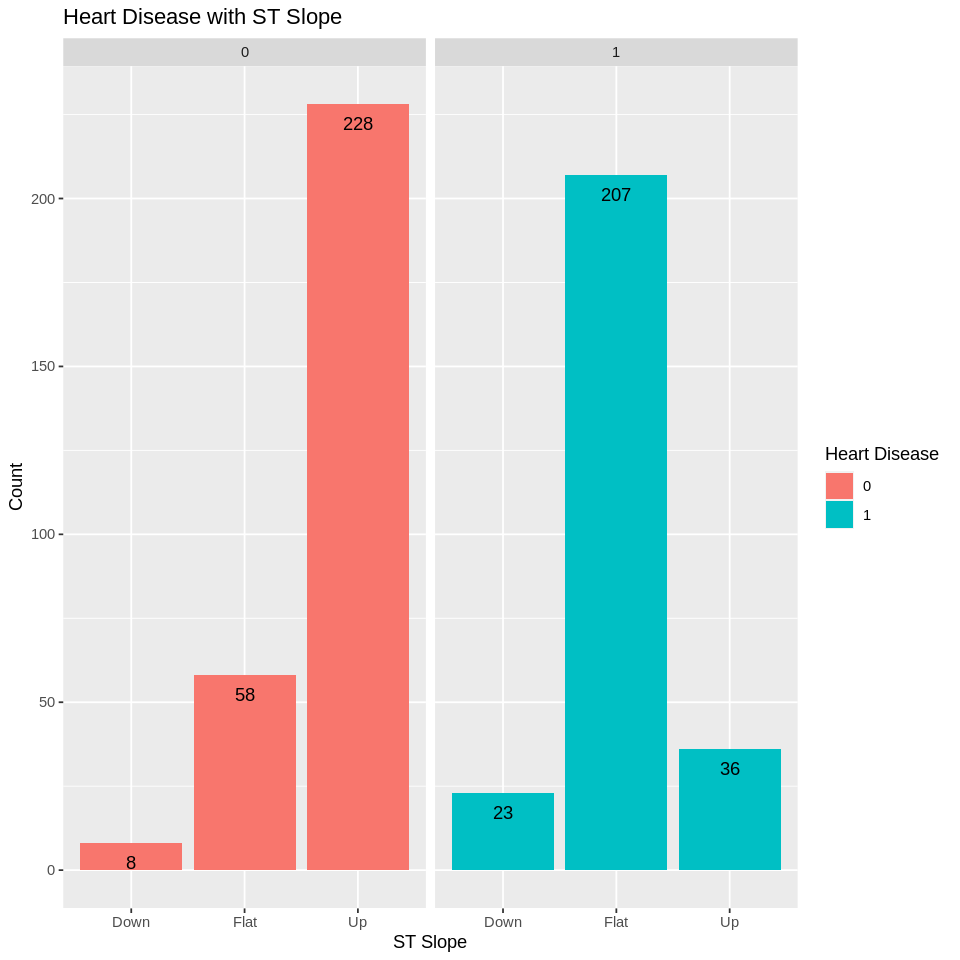

In [16]:
HeartDisease_ST_Slope_plot <- heart_train %>%
                              ggplot(aes(x = ST_Slope, fill = HeartDisease)) +
                              geom_bar() +
                              facet_grid(~HeartDisease) +
                              geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                              labs(title = "Heart Disease with ST Slope", x = "ST Slope", y = "Count", fill = "Heart Disease")

HeartDisease_ST_Slope_plot

#### Covert Charaters to Nummerics

In [17]:
heart_train <- heart_train %>%
                 mutate(Sex = as_factor(Sex)) %>%
                 mutate(Sex = as.numeric(Sex)) %>%
                 mutate(ChestPainType = as_factor(ChestPainType)) %>%
                 mutate(ChestPainType = as.numeric(ChestPainType))

head(heart_train)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,1,1,140,289,0,Normal,172,N,0.0,Up,0
49,2,2,160,180,0,Normal,156,N,1.0,Flat,1
37,1,1,130,283,0,ST,98,N,0.0,Up,0
39,1,2,120,339,0,Normal,170,N,0.0,Up,0
54,1,1,110,208,0,Normal,142,N,0.0,Up,0
37,1,3,140,207,0,Normal,130,Y,1.5,Flat,1


#### Finding the Best K

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Age,Sex,ChestPainType,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.3587010,-0.5576013,-1.5652479,1.31192838,0
-0.4105076,1.7901936,-0.4429191,0.66270281,1
-1.6747655,-0.5576013,-1.5652479,-1.69073992,0
-1.4640559,-0.5576013,-0.4429191,1.23077519,0
0.1162666,-0.5576013,-1.5652479,0.09463042,0
-1.6747655,-0.5576013,0.6794098,-0.39228876,1


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6695697,5,0.01810158,Model01


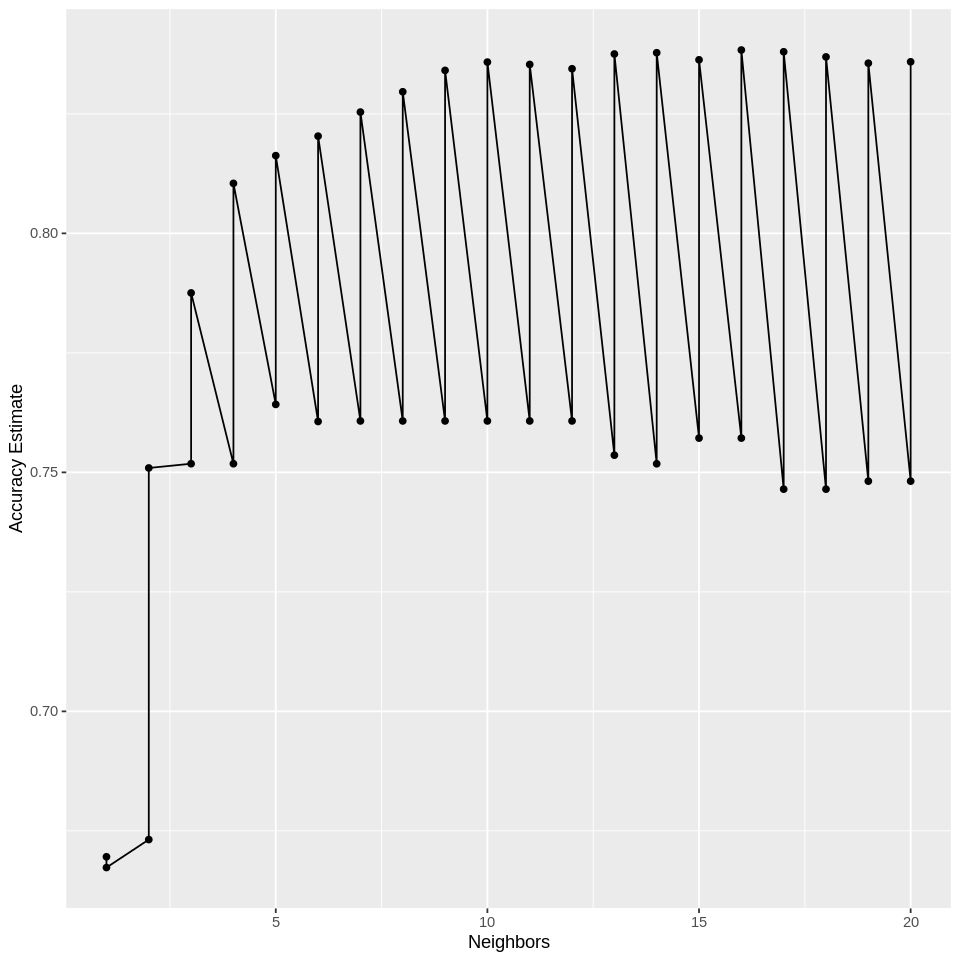

In [20]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ Age + Sex + ChestPainType + MaxHR, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)


gridvals <- tibble(neighbors = seq(from = 1, to = 20))


heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")




knn_tune
heart_recipe
head(preprocessed_data)
heart_min
accuracy_versus_k

#heart_results
#note Sex M = 2, F = 1
# ChetPainType ATA = 2, ASY =1, NAP =3

#### Use Best K to Predict

In [31]:
k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test <- heart_test%>%
              mutate(Sex = as_factor(Sex)) %>%
              mutate(Sex = as.numeric(Sex)) %>%
              mutate(ChestPainType = as_factor(ChestPainType)) %>%
              mutate(ChestPainType = as.numeric(ChestPainType))

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)



head(heart_test_predictions)
heart_summary
heart_test_predictions

.pred_class,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
0,48,1,1,138,214,0,Normal,108,Y,1.5,Flat,1
0,54,2,2,150,195,0,Normal,122,N,0.0,Up,0
0,45,1,3,130,237,0,Normal,170,N,0.0,Up,0
0,38,2,1,110,196,0,Normal,166,N,0.0,Flat,1
0,43,1,3,120,201,0,Normal,165,N,0.0,Up,0
0,36,2,3,120,267,0,Normal,160,N,3.0,Flat,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.50655022
kap,binary,0.04276255


.pred_class,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
0,48,1,1,138,214,0,Normal,108,Y,1.5,Flat,1
0,54,2,2,150,195,0,Normal,122,N,0.0,Up,0
0,45,1,3,130,237,0,Normal,170,N,0.0,Up,0
0,38,2,1,110,196,0,Normal,166,N,0.0,Flat,1
0,43,1,3,120,201,0,Normal,165,N,0.0,Up,0
0,36,2,3,120,267,0,Normal,160,N,3.0,Flat,1
1,51,2,3,125,188,0,Normal,145,N,0.0,Up,0
0,41,2,1,130,172,0,ST,130,N,2.0,Flat,1
1,41,1,3,110,250,0,ST,142,N,0.0,Up,0


In [33]:
heart_train <- heart_train %>%
               mutate(ST_Slope = as_factor(ST_Slope)) %>%
               mutate(ST_Slope = as.numeric(ST_Slope))

head(heart_train)
#note st_slope : 1 = up, 2 = flat, 3 = down

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
40,1,1,140,289,0,Normal,172,N,0.0,1,0
49,2,2,160,180,0,Normal,156,N,1.0,2,1
37,1,1,130,283,0,ST,98,N,0.0,1,0
39,1,2,120,339,0,Normal,170,N,0.0,1,0
54,1,1,110,208,0,Normal,142,N,0.0,1,0
37,1,3,140,207,0,Normal,130,Y,1.5,2,1


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

ST_Slope,Sex,ChestPainType,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.9810075,-0.5576013,-1.5652479,1.31192838,0
0.6990054,1.7901936,-0.4429191,0.66270281,1
-0.9810075,-0.5576013,-1.5652479,-1.69073992,0
-0.9810075,-0.5576013,-0.4429191,1.23077519,0
-0.9810075,-0.5576013,-1.5652479,0.09463042,0
0.6990054,-0.5576013,0.6794098,-0.39228876,1


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.7643424,5,0.009279722,Model02


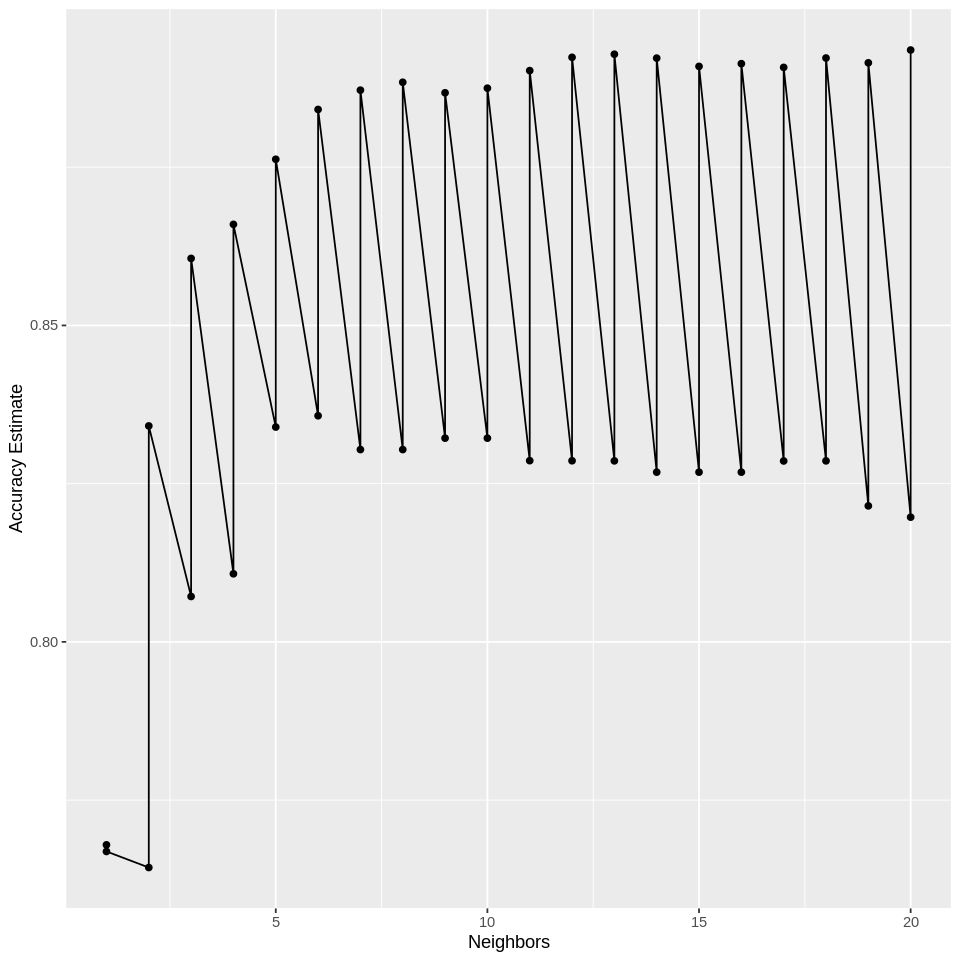

In [34]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ ST_Slope + Sex + ChestPainType + MaxHR, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)


gridvals <- tibble(neighbors = seq(from = 1, to = 20))


heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")




knn_tune
heart_recipe
head(preprocessed_data)
heart_min
accuracy_versus_k

In [37]:
k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test <- heart_test%>%
              mutate(ST_Slope = as_factor(ST_Slope)) %>%
              mutate(ST_Slope = as.numeric(ST_Slope))

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)



head(heart_test_predictions)
heart_summary

.pred_class,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
0,48,1,1,138,214,0,Normal,108,Y,1.5,1,1
0,54,2,2,150,195,0,Normal,122,N,0.0,2,0
1,45,1,3,130,237,0,Normal,170,N,0.0,2,0
0,38,2,1,110,196,0,Normal,166,N,0.0,1,1
1,43,1,3,120,201,0,Normal,165,N,0.0,2,0
0,36,2,3,120,267,0,Normal,160,N,3.0,1,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.2794760
kap,binary,-0.3874711


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          6

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Age,RestingBP,Cholesterol,Oldpeak,MaxHR,FastingBS,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.3587010,0.3698927,0.7130996,-0.8293635,1.31192838,-0.4429787,0
-0.4105076,1.5067747,-1.0810391,0.1142439,0.66270281,-0.4429787,1
-1.6747655,-0.1985483,0.6143396,-0.8293635,-1.69073992,-0.4429787,0
-1.4640559,-0.7669893,1.5360989,-0.8293635,1.23077519,-0.4429787,0
0.1162666,-1.3354303,-0.6201594,-0.8293635,0.09463042,-0.4429787,0
-1.6747655,0.3698927,-0.6366194,0.5860476,-0.39228876,-0.4429787,1


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6766956,5,0.01099066,Model01


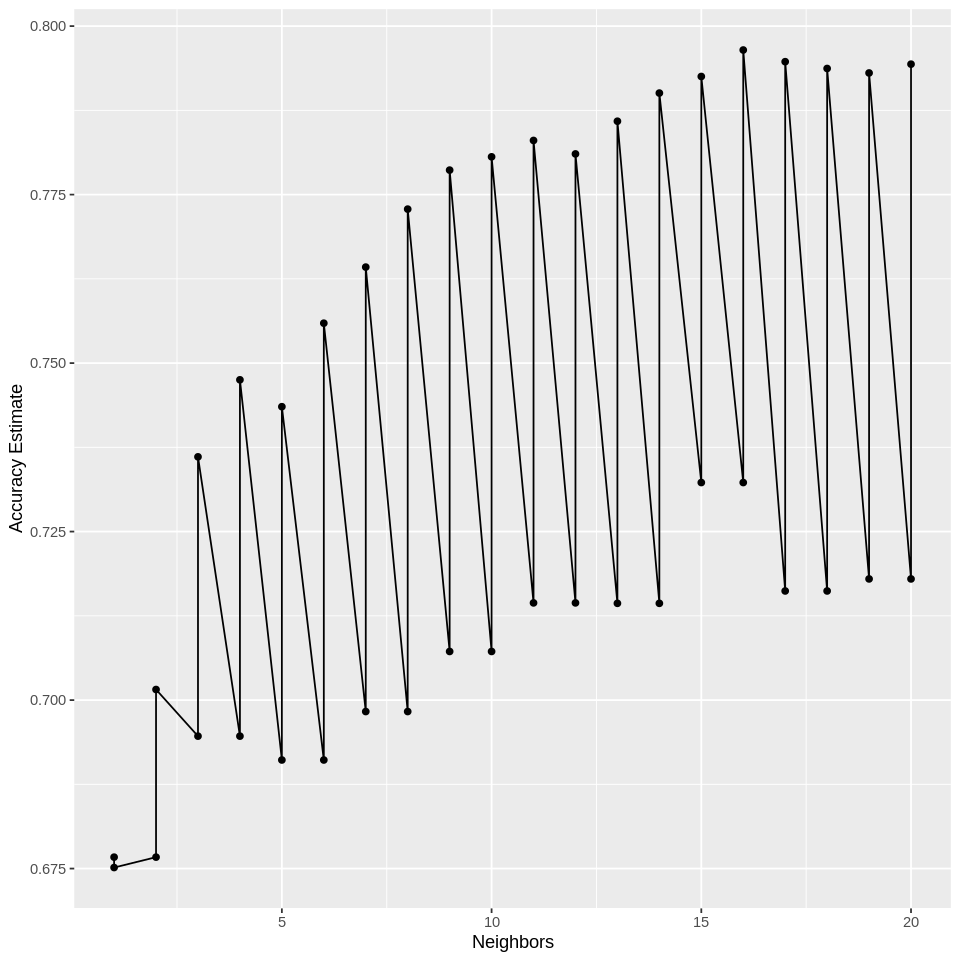

In [43]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ Age + RestingBP + Cholesterol + Oldpeak + MaxHR + FastingBS, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)


gridvals <- tibble(neighbors = seq(from = 1, to = 20))


heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")




knn_tune
heart_recipe
head(preprocessed_data)
heart_min
accuracy_versus_k

In [44]:
k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)



head(heart_test_predictions)
heart_summary

.pred_class,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1,48,1,1,138,214,0,Normal,108,Y,1.5,1,1
0,54,2,2,150,195,0,Normal,122,N,0.0,2,0
0,45,1,3,130,237,0,Normal,170,N,0.0,2,0
0,38,2,1,110,196,0,Normal,166,N,0.0,1,1
0,43,1,3,120,201,0,Normal,165,N,0.0,2,0
0,36,2,3,120,267,0,Normal,160,N,3.0,1,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6724891
kap,binary,0.3402604


# Methodolgy:
We will start by analyzing all of the graphs above and looking at each of the 7 variables to see its relationship with heart disease. The ones with the strongest correlation between the variable and heart diseases, we will use as our predictor variable:
1. Age vs. Heart Disease: people between the ages of 55-65 seem to have the most heart diseases.
2. Sex vs. Heart Disease: Males are much more likely to have heart disease. 
3. Chest Pain Type:  People with ASY chest pain are more likely to have heart diseases
4. Resting Blood pressure vs. Diseases: There's a weak positive relation but it's strong enough to make it a predictor variable. 
5. Cholesterol vs. Heart Diseases: There doesn't seem to be a correlation between cholesterol and heart disease. 
6. Maximum Heart rate vs. Heart diseases: people with a maximum heart rate in the range of 100-150 are more likely to have heart disease. 
7. Old Peak vs Heart Diseases: There's no correlation between old peak and heart disease. 

Based on this information we will be using age, sex, chest pain type, maximum heart rate,  as the predictor variables. So far we have only used a maximum of 2 predictor variables in this course. But later on in the final report, we plan on using multivariable linear regression to predict whether a person has heart disease or not that will take into account all of the predictor variables. We can also chnage the background color ti plot what the classifer will likely predict as we saw in the reading for week 7.

# Expected outcomes and significance:
We expect to find that the 4 predictor variables: age, sex, chest pain type, and maximum heart rate will help us tell if a person has heart disease or not, as there's a strong correlation between each predictor variable and heart disease. The impact of these findings would be very significant. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In the future, we should try to improve the accuracy of the overall algorithm by adding more predictor variables and having a large sample scale for the data. This same technique can then be applied to detect other types of diseases such as pneumonia in patients. The algorithm removes human error and there's very little chance of the algorithm misdiagnosing someone if it has a strong accuracy.  